# Beta And Rolling Beta

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xbbg import blp

## Helper Functions

In [2]:
def GetRet(Liste, Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [x + " Equity" for x in Liste],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    return Ret

def GetBench(Benchmark="SPX Index", Start = "20150101", End = pd.to_datetime("today").strftime("%Y%m%d")):
    Res = blp.bdh(tickers= [Benchmark],start_date = Start , end_date = End)
    Res.columns = [x[0] for x in Res.columns]
    Ret = (np.log(Res) - np.log(Res.shift(1))).iloc[1:,:]
    return Ret

In [3]:
Portfolio = ["AAPL US","ABMD US","ABT US","ADBE US","ALGN US","APD US","ATVI US","BAC US","BG US","CSCO US","DG US","DIS US","EA US","EQIX US","FB US","FCX US","FTCH US","HAS US","HD US","HON US","ISRG US","ITT US","JPM US","LHX US","MA US","MCD US","MDLZ US","MNST US","MSFT US","MU US","NKE US","TTWO US","VRTX US","WY US","XLNX US"]

In [4]:
df = GetRet(Portfolio)

In [5]:
SPX = GetBench()

In [6]:
dic = {}
for col in range(len(df.columns)):
    dic[df.columns[col]] = np.cov(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().T)[1,0] / np.cov(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().T)[0,0]

In [7]:
pd.Series(dic)

FTCH US Equity    1.285728
VRTX US Equity    1.006700
MA US Equity      1.231581
BG US Equity      0.809291
AAPL US Equity    1.196021
HAS US Equity     1.020375
WY US Equity      1.397430
MCD US Equity     0.838152
ABMD US Equity    0.844313
CSCO US Equity    1.088599
XLNX US Equity    1.101593
ABT US Equity     0.944330
DG US Equity      0.620072
MDLZ US Equity    0.776882
HD US Equity      1.099288
HON US Equity     0.999618
MNST US Equity    0.881239
ADBE US Equity    1.232511
DIS US Equity     0.942865
ISRG US Equity    1.204777
ALGN US Equity    1.448003
MSFT US Equity    1.214688
EA US Equity      0.819234
ITT US Equity     1.243675
MU US Equity      1.515358
APD US Equity     1.005311
EQIX US Equity    0.819846
JPM US Equity     1.213353
ATVI US Equity    0.911833
NKE US Equity     0.989035
FB US Equity      1.063212
LHX US Equity     0.862068
BAC US Equity     1.321691
FCX US Equity     1.532341
TTWO US Equity    0.907955
dtype: float64

In [37]:
dicAll = {}

for col in range(len(df.columns)):
    print(df.columns[col])
    Window = 20
    Pointer = {}
    for x in range(len(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna()) - Window):
        Cov = np.cov(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().iloc[x:x+Window].T)
        Pointer[pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().index[x+Window]] = Cov[1,0] / Cov[0,0]
    Window = 60
    Pointer2 = {}
    for x in range(len(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna()) - Window):
        Cov = np.cov(pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().iloc[x:x+Window].T)
        Pointer2[pd.concat((SPX[-252*3:], df[-252*3:][df.columns[col]]), axis=1).dropna().index[x+Window]] = Cov[1,0] / Cov[0,0]
    Pointer3 = pd.concat(( pd.Series(Pointer), pd.Series(Pointer2)), axis = 1)
    Pointer3.columns = ["1M", "3M"]
    print(Pointer3.iloc[-1])
    dicAll[df.columns[col]] = Pointer3.iloc[-1]
    


FTCH US Equity
1M    1.146043
3M    1.128331
Name: 2020-04-09 00:00:00, dtype: float64
VRTX US Equity
1M    0.859124
3M    0.887565
Name: 2020-04-09 00:00:00, dtype: float64
MA US Equity
1M    1.183497
3M    1.184308
Name: 2020-04-09 00:00:00, dtype: float64
BG US Equity
1M    0.969428
3M    0.936598
Name: 2020-04-09 00:00:00, dtype: float64
AAPL US Equity
1M    1.042623
3M    1.095580
Name: 2020-04-09 00:00:00, dtype: float64
HAS US Equity
1M    1.117187
3M    1.092309
Name: 2020-04-09 00:00:00, dtype: float64
WY US Equity
1M    1.889073
3M    1.705807
Name: 2020-04-09 00:00:00, dtype: float64
MCD US Equity
1M    1.061921
3M    1.014590
Name: 2020-04-09 00:00:00, dtype: float64
ABMD US Equity
1M    0.499178
3M    0.519078
Name: 2020-04-09 00:00:00, dtype: float64
CSCO US Equity
1M    0.978102
3M    0.980780
Name: 2020-04-09 00:00:00, dtype: float64
XLNX US Equity
1M    0.887356
3M    0.895437
Name: 2020-04-09 00:00:00, dtype: float64
ABT US Equity
1M    0.885906
3M    0.893649
Name: 2

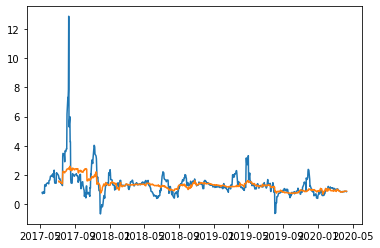

In [33]:
plt.plot(Pointer3)

In [42]:
pd.DataFrame(dicAll).T.to_clipboard()

In [27]:
test = {}
testo = pd.concat((SPX, df["NKE US Equity"]), axis = 1)[-252*3:].dropna()

for x in range(len(testo)-20):
    test[testo.index[20+x]] = np.cov(testo[x:20+x].T)[1,0] / np.cov(testo[x:x+20].T)[0,0]

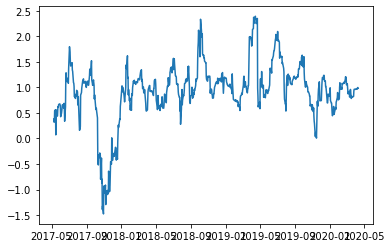

In [28]:
plt.plot(pd.Series(test))

In [15]:
 pd.concat((SPX, df["TTWO US Equity"]))[-252*3:]

,SPX Index,0
2017-04-10,NaN,-0.000684
2017-04-11,NaN,-0.000171
2017-04-12,NaN,-0.009459
2017-04-13,NaN,-0.005893
2017-04-17,NaN,0.017575
...,...,...
2020-04-03,NaN,-0.008571
2020-04-06,NaN,0.023356
2020-04-07,NaN,-0.010193
2020-04-08,NaN,-0.008028


In [16]:
SPX

,SPX Index
2015-01-05,-0.018447
2015-01-06,-0.008933
2015-01-07,0.011563
2015-01-08,0.017730
2015-01-09,-0.008439
...,...
2020-04-03,-0.015253
2020-04-06,0.067968
2020-04-07,-0.001604
2020-04-08,0.033489
